## **Question** 
- Product Segmentation: Can we cluster products based on price, ratings, and sales to identify distinct product categories or trends?

## LIBRARIES

In [4]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Dataset path
DATA_PATH = './Data/Data.csv'

# Keyword 
KEYWORD = []

In [6]:
df = pd.read_csv(DATA_PATH)

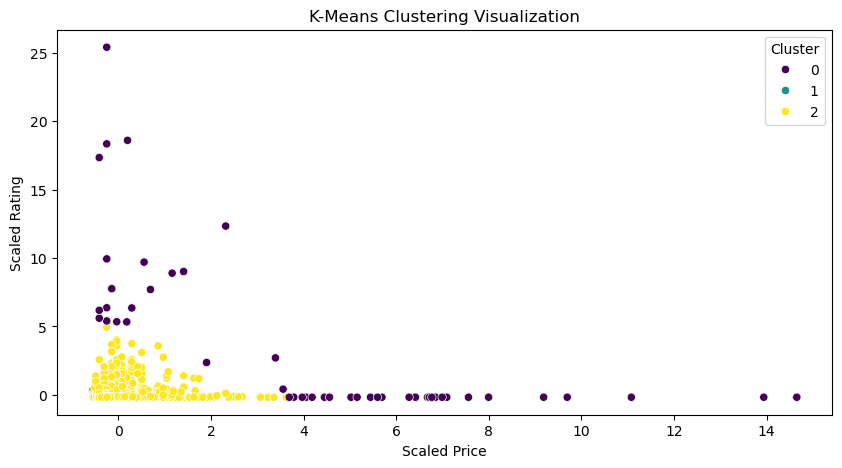

In [7]:
# Select relevant features
features = ['Giá', 'Lượt đánh giá', 'Số lượng đã bán']
data = df[features]

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Find the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Apply K-Means clustering with the chosen number of clusters (e.g., 3)
optimal_k = 3  # Choose the number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the elbow method
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=data_scaled[:, 0], y=data_scaled[:, 1], 
    hue=df['Cluster'], palette='viridis'
)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Scaled Price')
plt.ylabel('Scaled Rating')
plt.legend(title='Cluster')
plt.show()

# Save the clustered data
df.to_csv('./Data/clustered_products.csv', index=False)